In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2daba3e1a0e847ffbb604bc28b664378 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9jSIa5cxuVmxkEfJrsQ3k6rWwTMECCZYA4W8-BEA3Vb3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_2daba3e1a0e847ffbb604bc28b664378.get_object(Bucket='chronickidneydisease-donotdelete-pr-gtbthrhn5ay742',Key='chronickidneydisease.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.columns.values

array(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'classification'], dtype=object)

In [6]:
data.shape

(400, 26)

In [7]:
data.drop(['id'],axis=1,inplace=True)

In [8]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
data.columns=['age','bloodpressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','pottasium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']

In [11]:
data.columns

Index(['age', 'bloodpressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'pottasium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [12]:
data.head()

,age,bloodpressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bloodpressure            388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  pottasium                312 non-null    float64
 14  hemoglobin               3

In [52]:
data['age']=data['age'].astype('int64')

In [53]:
data['class'].unique()

array([0, 1])

In [54]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array([0, 1])

Text(0.5, 1.0, 'target Class')

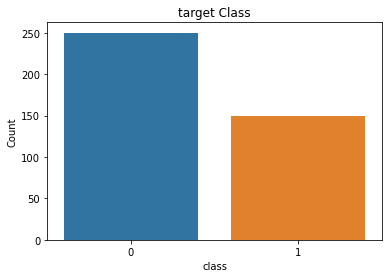

In [55]:
sns.countplot(x='class',data=data)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

In [56]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)

In [57]:
print(catcols)

set()


In [58]:

for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
   # print('*'*120+'\n')

In [59]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

KeyError: 'red_blood_cell_count'

In [60]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

set()


In [61]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
    #print('*'*120+'\n')

In [62]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'bacteria', 'sugar', 'pedal_edema', 'white_blood_cell_count', 'diabetesmellitus', 'appetite', 'bloodpressure', 'age', 'hemoglobin', 'coronary_artery_disease', 'pus_cell_clumps', 'packed_cell_volume', 'sodium', 'specific_gravity', 'hypertension', 'blood_glucose_random', 'serum_creatinine', 'red_blood_cells', 'pottasium', 'pus_cell', 'albumin', 'red_blood_cell_count', 'anemia', 'class', 'blood_urea'}


In [63]:
for i in contcols:
    print("countinous columns",i)
    print(c(data[i]))
    print('*'*120+'\n')

countinous columns bacteria
Counter({0: 378, 1: 22})
************************************************************************************************************************

countinous columns sugar
Counter({0: 339, 2: 18, 3: 14, 4: 13, 1: 13, 5: 3})
************************************************************************************************************************

countinous columns pedal_edema
Counter({0: 324, 1: 76})
************************************************************************************************************************

countinous columns white_blood_cell_count
Counter({0: 106, 54: 11, 26: 10, 52: 9, 48: 9, 31: 9, 28: 8, 63: 8, 18: 8, 36: 7, 47: 7, 50: 7, 29: 7, 6: 6, 22: 6, 60: 6, 59: 6, 34: 5, 21: 5, 41: 5, 37: 5, 44: 5, 16: 5, 56: 5, 10: 5, 39: 5, 51: 5, 20: 4, 42: 4, 57: 4, 35: 4, 15: 4, 58: 4, 27: 4, 24: 4, 8: 4, 32: 3, 7: 3, 23: 3, 5: 3, 33: 3, 38: 3, 14: 3, 3: 2, 66: 2, 13: 2, 43: 2, 80: 2, 30: 2, 78: 2, 46: 2, 40: 2, 82: 2, 74: 2, 77: 2, 45: 2, 17: 2, 

In [64]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')

In [65]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(catcols)

set()


In [66]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'specific_gravity', 'sugar', 'albumin'}


In [67]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({0: 366, 1: 34})

In [68]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({2: 136, 1: 263, 0: 1})

In [69]:
data.isnull().sum()

age                        0
bloodpressure              0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
pottasium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [70]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')

In [71]:
data.columns

Index(['age', 'bloodpressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'pottasium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [72]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['bloodpressure'].fillna(data['bloodpressure'].mean(),inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['pottasium'].fillna(data['pottasium'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)

In [73]:
data.isnull().sum()

age                        0
bloodpressure              0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
pottasium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [74]:
for i in catcols :
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])
    

In [75]:
data.head()

,age,bloodpressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48,80.0,3,1,0,1,1,0,0,121.000000,...,32,36,31,1,2,0,0,0,0,0
1,7,50.0,3,4,0,1,1,0,0,148.036517,...,25,20,26,0,1,0,0,0,0,0
2,62,80.0,1,2,3,1,1,0,0,423.000000,...,18,34,26,0,2,0,1,0,1,0
3,48,70.0,0,4,0,1,0,1,0,117.000000,...,19,26,17,1,1,0,1,1,1,0
4,51,80.0,1,2,0,1,1,0,0,106.000000,...,22,32,24,0,1,0,0,0,0,0


In [76]:
data.isnull().sum()

age                        0
bloodpressure              0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
pottasium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [77]:
setcols=['age','red_blood_cells','pus_cell','blood_glucose_random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=setcols)
y=pd.DataFrame(data,columns=['class'])

In [78]:
x.shape

(400, 9)

In [79]:
y.shape

(400, 1)

In [80]:
x.isnull().sum()

age                        0
red_blood_cells            0
pus_cell                   0
blood_glucose_random       0
blood_urea                 0
pedal_edema                0
anemia                     0
diabetesmellitus           0
coronary_artery_disease    0
dtype: int64

In [81]:
y.isnull().sum()

class    0
dtype: int64

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 9)
(80, 9)
(320, 1)
(80, 1)


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   bloodpressure            400 non-null    float64
 2   specific_gravity         400 non-null    int64  
 3   albumin                  400 non-null    int64  
 4   sugar                    400 non-null    int64  
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  pottasium                400 non-null    float64
 14  hemoglobin               4

In [85]:
data['class'].unique()

array([0, 1])

In [86]:

rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)


/tmp/wsuser/ipykernel_164/2243325452.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(x_train,y_train)


In [87]:
y_pred = rf.predict(x_test)

In [88]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9625
[[52  2]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.93      0.96      0.94        26

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [89]:
!pip install ibm_watson_machine_learning

In [90]:
from ibm_watson_machine_learning import APIClient

In [91]:
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"0cJ7n0wwaMHrRtGePMMIDfpkmYg7ue8E-NwwyDj9Dxmo"
}

In [92]:
client=APIClient(wml_credentials)

In [93]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [94]:
space_uid=guid_from_space_name(client,'kidneydisease')
print(space_uid)

73bd6d6d-6fac-48b5-b8e4-627731c1925d


In [95]:
client.set.default_space(space_uid)

'SUCCESS'

In [96]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [101]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [103]:
model_details=client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME:"chronic_kidney",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                           )
model_id=client.repository.get_model_id(model_details)

In [104]:
model_id

'b7368f5f-982c-4df8-b740-17feb80fa734'

In [99]:
pickle.dump(rf,open('CKD.pkl','wb'))